In [52]:
import numpy as np#load ice cube data
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pickle as pkl

# LOADING FILES

In [53]:
files=["IC40_exp_new.csv","IC59_exp_new.csv","IC79_exp_new.csv","IC86_I_exp_new.csv","IC86_II_exp_new.csv", 
       "IC86_III_exp_new.csv","IC86_IV_exp_new.csv","IC86_V_exp_new.csv","IC86_VI_exp_new.csv",
       "IC86_VII_exp_new.csv"]

In [54]:
data=np.loadtxt("IC40_exp_new.csv")
for name in files[1:]:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T
len(RA)
    

1134431

In [84]:
fields=[log10_E,RA,Dec,Ang_err]
print(Dec)
iceang=fields[3]


[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]


In [56]:
print(fields)

[array([3.31, 5.17, 3.92, ..., 2.88, 2.98, 3.28]), array([203.024,  75.024,  97.501, ..., 308.127, 332.199, 213.309]), array([ 16.76 , -13.371,  11.29 , ...,  42.543,  44.72 ,   4.708]), array([0.48, 0.62, 0.56, ..., 0.3 , 0.21, 0.25])]


In [57]:
df=pd.read_csv("TabO1.csv")
#print(df)
df.loc[31, 'RA'] = '08 43 00.0'
df.loc[31, 'Decl'] = '+73 30 00'
df.loc[32, 'RA'] = '00 47 30.0'
df.loc[32, 'Decl'] = '-25 11 37 '
df.loc[33,'RA']='09 52 34.1'
df.loc[33,'Decl']='+68 50 42'
df.loc[34,'RA']='00 44 18.0'
df.loc[34,'Decl']='+42 18 00'
df.loc[35,'RA']='13 42 06.24'
df.loc[35,'Decl']='-26 53 48.1'
df.loc[36,'RA']='00 49 12.0 '
df.loc[36,'Decl']='26 06 00  '

df.to_csv("updated_file.csv", index=False)
print(df)

#df.loc[1, 'RA'] = '09 55 59.28'
#df.loc[1, 'Decl'] = '+69 41 02.40'


                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [58]:
df1=df.rename({'RA':'RA_M'},axis=1)
print(df1)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

[37 rows x 47 columns]


In [59]:
import re
def convert_ra_to_comma(ra):#replacing space with comma
    return re.sub(r"\s+", ",",ra.strip())
df1['RA_M_comma'] = df1['RA_M'].apply(convert_ra_to_comma)# Apply the function to the entire RA_M column
def convert_dec_to_comma(dec):
    return re.sub(r"\s+", ",",dec.strip())
df1['dec_M_comma'] = df1['Decl'].apply(convert_dec_to_comma)
    
print(df1[['Name', 'RA_M', 'RA_M_comma', 'Decl','dec_M_comma']])# Show the DataFrame with the new RA_M_Comma column

                     Name            RA_M      RA_M_comma            Decl  \
0   CXOU J010043.1-721134     01 00 43.14     01,00,43.14     -72 11 33.8   
1              4U 0142+61    01 46 22.407    01,46,22.407    +61 45 03.19   
2           SGR 0418+5729    04 18 33.867    04,18,33.867    +57 32 22.91   
3           SGR 0501+4516     05 01 06.76     05,01,06.76    +45 16 33.92   
4             SGR 0526-66     05 26 00.89     05,26,00.89     -66 04 36.3   
5          1E 1048.1-5937     10 50 07.14     10,50,07.14     -59 53 21.4   
6          1E 1547.0-5408  15 50 54.12386  15,50,54.12386  -54 18 24.1141   
7          PSR J1622-4950     16 22 44.89     16,22,44.89     -49 50 52.7   
8             SGR 1627-41    16 35 51.844    16,35,51.844    -47 35 23.31   
9   CXOU J164710.2-455216     16 47 10.20     16,47,10.20    -45 52 16.90   
10  1RXS J170849.0-400910     17 08 46.87     17,08,46.87    -40 08 52.44   
11  CXOU J171405.7-381031     17 14 05.74     17,14,05.74     -38 10 30.9   

In [60]:
def ra_to_degrees(ra_string):
    ra_parts = ra_string.split(',')
    ra_hours = int(ra_parts[0])  # Convert to integer (handles leading zeros)
    ra_minutes = int(ra_parts[1])  # Convert to integer (handles leading zeros)
    ra_seconds = float(ra_parts[2])  # Convert to float
    return (ra_hours * 15) + (ra_minutes / 4) + (ra_seconds / 240)
#field3.loc[:,'RA_M(deg)']=field3['RA_M_comma'].apply(ra_to_degrees)
def dec_to_degrees(dec_string):
    dec_parts = dec_string.split(',')
    dec_degrees = int(dec_parts[0])  # Convert to integer (handles leading zeros)
    dec_minutes = int(dec_parts[1])  # Convert to integer (handles leading zeros)
    dec_seconds = float(dec_parts[2])
    sign = 1 if dec_degrees >= 0 else -1
    return abs(dec_degrees) + (dec_minutes / 60) + (dec_seconds / 3600) * sign
df1['RA_M(deg)'] = df1['RA_M_comma'].apply(ra_to_degrees)
df1['Decl_M(deg)'] = df1['dec_M_comma'].apply(dec_to_degrees)
print(df1)

                     Name     Period    Period_Err Pdot_lim          Pdot  \
0   CXOU J010043.1-721134   8.020392  9.000000e-06      NaN  1.880000e-11   
1              4U 0142+61   8.688692  5.000000e-08      NaN  2.022000e-12   
2           SGR 0418+5729   9.078388  5.000000e-08      NaN  4.000000e-15   
3           SGR 0501+4516   5.762069  1.000000e-07      NaN  5.940000e-12   
4             SGR 0526-66   8.054400  2.000000e-04      NaN  3.800000e-11   
5          1E 1048.1-5937   6.457875  3.000000e-06      NaN  2.250000e-11   
6          1E 1547.0-5408   2.072125  1.000000e-07      NaN  4.770000e-11   
7          PSR J1622-4950   4.326100  1.000000e-04      NaN  1.700000e-11   
8             SGR 1627-41   2.594578  6.000000e-06      NaN  1.900000e-11   
9   CXOU J164710.2-455216  10.610644  1.700000e-05        <  4.000000e-13   
10  1RXS J170849.0-400910  11.005025  1.700000e-07      NaN  1.945500e-11   
11  CXOU J171405.7-381031   3.825352  4.000000e-06      NaN  6.400000e-11   

In [61]:
df1.at[32, 'Decl_M(deg)'] =- 25.02
df1.at[15, 'Decl_M(deg)'] = 16.11
df1.at[35, 'Decl_M(deg)'] =- 26.87 
df1.at[36, 'Decl_M(deg)'] = -26.10
field3 = df1[['RA_M(deg)', 'Decl_M(deg)']]
print(field3)


     RA_M(deg)  Decl_M(deg)
0    15.179750    72.173944
1    26.593363    61.750886
2    64.641113    57.539697
3    75.278167    45.276089
4    81.503708    66.056583
5   162.529750    59.877389
6   237.725516    54.293302
7   245.687042    49.818694
8   248.966017    47.576858
9   251.792500    45.861972
10  257.195292    40.118767
11  258.523917    38.158083
12  266.417350    28.991717
13  272.163904    20.388931
14  272.462862    19.702241
15  274.515417    16.110000
16  275.575000    16.059222
17  278.434875     8.514583
18  278.717158     8.734439
19  280.330596     4.930233
20  283.194458     0.554944
21  286.809708     9.322250
22  293.731657    21.896607
23  345.284562    58.879014
24  118.927000    29.536333
25  270.245833    22.920000
26  272.046667    20.619722
27  274.714083    15.977050
28  281.227833     2.918583
29  303.487083    34.330000
30  281.603917     2.958306
31  130.750000    73.500000
32   11.875000   -25.020000
33  148.142083    68.845000
34   11.075000    42

In [62]:
ra_mag=np.array(field3['RA_M(deg)'])
dec_mag=np.array(field3['Decl_M(deg)'])
ice_ra=(fields[1])
ice_dec=(fields[2])
print(ice_ra)
print(ice_dec)
print(ra_mag)
#print(dec_mag)|
print(dec_mag)

[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]
[ 15.17975     26.5933625   64.6411125   75.27816667  81.50370833
 162.52975    237.72551608 245.68704167 248.96601667 251.7925
 257.19529167 258.52391667 266.41735    272.16390417 272.46286233
 274.51541667 275.575      278.434875   278.71715833 280.33059583
 283.19445833 286.80970833 293.7316575  345.2845625  118.927
 270.24583333 272.04666667 274.71408333 281.22783333 303.48708333
 281.60391667 130.75        11.875      148.14208333  11.075
 205.526       12.3       ]
[ 72.17394444  61.75088611  57.53969722  45.27608889  66.05658333
  59.87738889  54.29330164  49.81869444  47.57685833  45.86197222
  40.11876667  38.15808333  28.99171722  20.38893056  19.70224125
  16.11        16.05922222   8.51458333   8.73443889   4.93023333
   0.55494444   9.32225     21.89660733  58.87901389  29.53633333
  22.92        20.61972222  15.97705      2.91858333  34.33
   2.95830556  73.5       

# INTEGRAL OF AREA*DF/DE

In [63]:
column_namesarea = ["log10(E_nu/GeV)_min", "log10(E_nu/GeV)_max", "Dec_nu_min[deg]", "Dec_nu_max[deg]", "A_Eff[cm^2]"]
dataarea1= pd.read_csv("IC40_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)
dataarea2= pd.read_csv("IC59_effectiveArea.csv", sep="\s+", names=column_namesarea, skiprows=1)
dataarea3= pd.read_csv("IC79_effectiveArea.csv", sep="\s+", names=column_namesarea, skiprows=1)
dataarea4= pd.read_csv("IC86_I_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)
dataarea5= pd.read_csv("IC86_II_effectiveArea.csv", sep="\s+",  names=column_namesarea, skiprows=1)

In [64]:
gamma=-2.53
Emin1=dataarea1["log10(E_nu/GeV)_min"]
Emax1=dataarea1["log10(E_nu/GeV)_max"]
decmin1=dataarea1["Dec_nu_min[deg]"]
decmax1=dataarea1["Dec_nu_max[deg]"]
dec1=0.5*(decmin1+decmax1)
effarea1=dataarea1[ "A_Eff[cm^2]"]
Eff_1=[]
phiE_1=[]
for j in range(0,37):
    mdec=dec_mag[j]
    idx1=np.where((decmin1<=mdec)&(decmax1>mdec))
    log10E1=[0.5*(Emin1[i]+Emax1[i]) for i in idx1]
    A1=[effarea1[i] for i in idx1] #A in cm^2
    E1=pow(10,np.array(log10E1)-5)
    phiE1=E1**gamma
    y1=A1*phiE1
    eff1=np.trapz(y1,x=E1)
    Eff_1.append(eff1)
    #phiE_1.append(phiE1)
    #print(phiE1)

In [65]:
#print(Eff_1)
#(phiE_1)

In [66]:
gamma=-2.53
Emin2=dataarea2["log10(E_nu/GeV)_min"]
Emax2=dataarea2["log10(E_nu/GeV)_max"]
decmin2=dataarea2["Dec_nu_min[deg]"]
decmax2=dataarea2["Dec_nu_max[deg]"]
dec2=0.5*(decmin2+decmax2)
effarea2=dataarea2[ "A_Eff[cm^2]"]
Eff_2=[]

for i in range(0,37):
    mdec=dec_mag[i]
    idx2=np.where((decmin2<=mdec)&(decmax2>mdec))
    log10E2=[0.5*(Emin2[i]+Emax2[i]) for i in idx2]
    A2=[effarea2[i] for i in idx2] #A in cm^2
    E2=pow(10,np.array(log10E2)-5)
    phiE2=E2**gamma
    y2=A2*phiE2
    eff2=np.trapz(y2,x=E2)
    Eff_2.append(eff2)
print(Eff_2)
print(phiE2)

[array([9340181.52662067]), array([10229945.65922229]), array([10665971.57608409]), array([11269802.87488753]), array([10229945.65922229]), array([10665971.57608409]), array([11166373.3732454]), array([10656946.40728885]), array([11006679.64645741]), array([11269802.87488753]), array([11254290.59084455]), array([11109115.6857582]), array([11691305.77805648]), array([11923666.77731739]), array([11923666.77731739]), array([11994636.63801732]), array([11994636.63801732]), array([12326875.4817617]), array([12326875.4817617]), array([11903772.20806117]), array([11368237.04474474]), array([12095562.59355901]), array([11593709.81384374]), array([10665971.57608409]), array([11691305.77805648]), array([11593709.81384374]), array([11923666.77731739]), array([11994636.63801732]), array([12036430.51953912]), array([11169425.95882318]), array([12036430.51953912]), array([9340181.52662067]), array([105602.32374289]), array([9340181.52662067]), array([11254290.59084455]), array([93030.24680543]), arr

In [67]:
gamma=-2.53
Emin3=dataarea3["log10(E_nu/GeV)_min"]
Emax3=dataarea3["log10(E_nu/GeV)_max"]
decmin3=dataarea3["Dec_nu_min[deg]"]
decmax3=dataarea3["Dec_nu_max[deg]"]
dec3=0.5*(decmin3+decmax3)
effarea3=dataarea3[ "A_Eff[cm^2]"]
Eff_3=[]

for i in range(0,37):
    mdec=dec_mag[i]
    idx3=np.where((decmin3<=mdec)&(decmax3>mdec))
    log10E3=[0.5*(Emin3[i]+Emax3[i]) for i in idx3]
    A3=[effarea3[i] for i in idx3] #A in cm^2
    E3=pow(10,np.array(log10E3)-5)
    phiE3=E3**gamma
    y3=A3*phiE3
    eff3=np.trapz(y3,x=E3)
    Eff_3.append(eff3)
    
print(Eff_3)


[array([11780734.50115796]), array([12766202.76005507]), array([13434035.29672661]), array([14364868.38254651]), array([12766202.76005507]), array([13434035.29672661]), array([14057592.02213136]), array([14047706.04071065]), array([14221540.53892313]), array([14364868.38254651]), array([14498990.95105567]), array([14463791.26166035]), array([14515125.50806031]), array([15358142.83807105]), array([15358142.83807105]), array([15363446.0230365]), array([15363446.0230365]), array([15566527.79863111]), array([15566527.79863111]), array([15237716.24000902]), array([14744885.50990121]), array([15378698.47960457]), array([15205876.94947916]), array([13434035.29672661]), array([14515125.50806031]), array([15205876.94947916]), array([15358142.83807105]), array([15363446.0230365]), array([15237968.23907757]), array([14513432.67333997]), array([15237968.23907757]), array([11780734.50115796]), array([173076.44236549]), array([11780734.50115796]), array([14498990.95105567]), array([144336.58716871])

In [68]:
gamma=-2.53
Emin=dataarea4["log10(E_nu/GeV)_min"]
Emax=dataarea4["log10(E_nu/GeV)_max"]
decmin=dataarea4["Dec_nu_min[deg]"]
decmax=dataarea4["Dec_nu_max[deg]"]
dec=0.5*(decmin+decmax)
effarea=dataarea4[ "A_Eff[cm^2]"]
Eff_4=[]
for i in range(0,37):
    mdec=dec_mag[i]
    idx=np.where((decmin<=mdec)&(decmax>mdec))
    log10E=[0.5*(Emin[i]+Emax[i]) for i in idx]
    A=[effarea[i] for i in idx] #A in cm^2
    E=pow(10,np.array(log10E)-5)
    phiE=E**gamma
    y=A*phiE
    eff4=np.trapz(y,x=E)
    Eff_4.append(eff4)
#print (Eff_4)
print(log10E)

[560    2.1
561    2.3
562    2.5
563    2.7
564    2.9
565    3.1
566    3.3
567    3.5
568    3.7
569    3.9
570    4.1
571    4.3
572    4.5
573    4.7
574    4.9
575    5.1
576    5.3
577    5.5
578    5.7
579    5.9
580    6.1
581    6.3
582    6.5
583    6.7
584    6.9
585    7.1
586    7.3
587    7.5
588    7.7
589    7.9
590    8.1
591    8.3
592    8.5
593    8.7
594    8.9
595    9.1
596    9.3
597    9.5
598    9.7
599    9.9
dtype: float64]


In [69]:
gamma=-2.53
Emin=dataarea5["log10(E_nu/GeV)_min"]
Emax=dataarea5["log10(E_nu/GeV)_max"]
decmin=dataarea5["Dec_nu_min[deg]"]
decmax=dataarea5["Dec_nu_max[deg]"]
dec=0.5*(decmin+decmax)
effarea=dataarea5[ "A_Eff[cm^2]"]
Eff_5=[]
for i in range(0,37):
    mdec=dec_mag[i]
    idx=np.where((decmin<=mdec)&(decmax>mdec))
    log10E=[0.5*(Emin[i]+Emax[i]) for i in idx]
    A=[effarea[i] for i in idx] #A in cm^2
    E=pow(10,np.array(log10E)-5)
    phiE=E**gamma
    y=A*phiE
    eff5=np.trapz(y,x=E)
    Eff_5.append(eff5)
   # print(idx)
print (Eff_5)


[array([15179517.57947307]), array([15860741.83382469]), array([16317836.54165214]), array([16766963.54495137]), array([15860741.83382469]), array([16317836.54165214]), array([16783079.72309577]), array([16832905.18910803]), array([16715826.03883107]), array([16766963.54495137]), array([16807972.63847226]), array([16960996.36309858]), array([17269942.78554372]), array([17509271.76194988]), array([17509271.76194988]), array([17380226.98519227]), array([17380226.98519227]), array([17229599.59357484]), array([17229599.59357484]), array([17108896.27166581]), array([16010995.73767465]), array([17217625.66087968]), array([17505025.59084332]), array([16317836.54165214]), array([17269942.78554372]), array([17505025.59084332]), array([17509271.76194988]), array([17380226.98519227]), array([16757590.21957814]), array([16998989.07002765]), array([16757590.21957814]), array([15179517.57947307]), array([142539.1296101]), array([15179517.57947307]), array([16807972.63847226]), array([124813.74190685

In [70]:
#np.vstack([Eff_1,Eff_2,Eff_3,Eff_4,Eff_5])

In [71]:
column_namestime=["MJD_start[days]","MJD_stop[days]"]
datatime1= pd.read_csv("IC40_exp(1).csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime2= pd.read_csv("IC59_exp.csv", sep="\s+", names=column_namestime, skiprows=1)
datatime3= pd.read_csv("IC79_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime4= pd.read_csv("IC86_I_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime5= pd.read_csv("IC86_II_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime6= pd.read_csv("IC86_III_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime7= pd.read_csv("IC86_IV_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime8= pd.read_csv("IC86_V_exp.csv", sep="\s+", names=column_namestime, skiprows=1)
datatime9= pd.read_csv("IC86_VI_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)
datatime10= pd.read_csv("IC86_VII_exp.csv", sep="\s+",  names=column_namestime, skiprows=1)

In [72]:
#print(datatime10)
datatimesum1=np.sum(datatime1['MJD_stop[days]']-datatime1['MJD_start[days]'])
datatimesum2=np.sum(datatime2['MJD_stop[days]']-datatime2['MJD_start[days]'])
datatimesum3=np.sum(datatime3['MJD_stop[days]']-datatime3['MJD_start[days]'])
datatimesum4=np.sum(datatime4['MJD_stop[days]']-datatime4['MJD_start[days]'])
datatimesum5=np.sum(datatime5['MJD_stop[days]']-datatime5['MJD_start[days]'])
datatimesum6=np.sum(datatime6['MJD_stop[days]']-datatime6['MJD_start[days]'])
datatimesum7=np.sum(datatime7['MJD_stop[days]']-datatime7['MJD_start[days]'])
datatimesum8=np.sum(datatime8['MJD_stop[days]']-datatime8['MJD_start[days]'])
datatimesum9=np.sum(datatime9['MJD_stop[days]']-datatime9['MJD_start[days]'])
datatimesum10=np.sum(datatime10['MJD_stop[days]']-datatime10['MJD_start[days]'])
#print(datatimesum1)
print(datatimesum1)

376.3603109101532


In [73]:
nsj_1=np.array(Eff_1)*datatimesum1
nsj_2=np.array(Eff_2)*datatimesum2
nsj_3=np.array(Eff_3)*datatimesum3
nsj_4=np.array(Eff_4)*datatimesum4
nsj_5=np.array(Eff_5)*datatimesum5
nsj_6=np.array(Eff_5)*datatimesum6
nsj_7=np.array(Eff_5)*datatimesum7
nsj_8=np.array(Eff_5)*datatimesum8
nsj_9=np.array(Eff_5)*datatimesum9
nsj_10=np.array(Eff_5)*datatimesum10
#print(nsj_1)
#print(nsj_10)

In [74]:
total_nsj=(nsj_1+nsj_2+nsj_3+nsj_4+nsj_5+nsj_6+nsj_7+nsj_8+nsj_9+nsj_10)

print(total_nsj)
len(total_nsj)

[[4.69685622e+10]
 [4.96128997e+10]
 [5.11408570e+10]
 [5.33937310e+10]
 [4.96128997e+10]
 [5.11408570e+10]
 [5.29593077e+10]
 [5.30168531e+10]
 [5.30119653e+10]
 [5.33937310e+10]
 [5.34282260e+10]
 [5.41515903e+10]
 [5.52964093e+10]
 [5.61376444e+10]
 [5.61376444e+10]
 [5.57654322e+10]
 [5.57654322e+10]
 [5.50884066e+10]
 [5.50884066e+10]
 [5.43933076e+10]
 [5.08139329e+10]
 [5.51013112e+10]
 [5.59854164e+10]
 [5.11408570e+10]
 [5.52964093e+10]
 [5.59854164e+10]
 [5.61376444e+10]
 [5.57654322e+10]
 [5.32461678e+10]
 [5.41521424e+10]
 [5.32461678e+10]
 [4.69685622e+10]
 [5.02734837e+08]
 [4.69685622e+10]
 [5.34282260e+10]
 [4.41000533e+08]
 [5.02734837e+08]]


37

In [75]:
a=10**-7/(10**5)**2
b=10**-11/(10**5)**2
phi0= np.logspace(-21, -18, 40)#GeV cm^-2 sec^-1
nsj_tot=total_nsj*phi0
#print(nsj_tot)
len(nsj_tot[0])
#print(nsj_tot.shape)
dF=phiE2*phi0
#print(dF)
E_sqdf=E**2*dF
#print(E_sqdf)
print(phi0)

[1.00000000e-21 1.19377664e-21 1.42510267e-21 1.70125428e-21
 2.03091762e-21 2.42446202e-21 2.89426612e-21 3.45510729e-21
 4.12462638e-21 4.92388263e-21 5.87801607e-21 7.01703829e-21
 8.37677640e-21 1.00000000e-20 1.19377664e-20 1.42510267e-20
 1.70125428e-20 2.03091762e-20 2.42446202e-20 2.89426612e-20
 3.45510729e-20 4.12462638e-20 4.92388263e-20 5.87801607e-20
 7.01703829e-20 8.37677640e-20 1.00000000e-19 1.19377664e-19
 1.42510267e-19 1.70125428e-19 2.03091762e-19 2.42446202e-19
 2.89426612e-19 3.45510729e-19 4.12462638e-19 4.92388263e-19
 5.87801607e-19 7.01703829e-19 8.37677640e-19 1.00000000e-18]


In [76]:
print(nsj_tot)

[[4.69685622e-11 5.60699724e-11 6.69350234e-11 ... 3.29580199e-08
  3.93445143e-08 4.69685622e-08]
 [4.96128997e-11 5.92267208e-11 7.07034758e-11 ... 3.48135617e-08
  4.15596167e-08 4.96128997e-08]
 [5.11408570e-11 6.10507605e-11 7.28809719e-11 ... 3.58857351e-08
  4.28395524e-08 5.11408570e-08]
 ...
 [5.34282260e-11 6.37813682e-11 7.61407076e-11 ... 3.74907908e-08
  4.47556303e-08 5.34282260e-08]
 [4.41000533e-13 5.26456135e-13 6.28471037e-13 ... 3.09451762e-10
  3.69416286e-10 4.41000533e-10]
 [5.02734837e-13 6.00153105e-13 7.16448758e-13 ... 3.52770960e-10
  4.21129731e-10 5.02734837e-10]]


# CALCULATE NS

In [85]:
ns_in=[]
for j in range(0,40):
        nsj_t = nsj_tot[:,j]
        ns=np.sum(nsj_t) #np.sum(xw_model=37)
        ns_in.append(ns)
print(ns_in)
ns_in=np.array(ns_in)
print(ns_in.shape)

[1.8111868815721484e-09, 2.162152593000441e-09, 2.581127261346226e-09, 3.0812894338874767e-09, 3.678371352536366e-09, 4.391153800209451e-09, 5.24205683686562e-09, 6.257845006389689e-09, 7.470469196097334e-09, 8.918071628948217e-09, 1.0646185599774591e-08, 1.2709167692367492e-08, 1.5171907526780075e-08, 1.8111868815721486e-08, 2.1621525930004408e-08, 2.581127261346226e-08, 3.0812894338874766e-08, 3.6783713525363674e-08, 4.39115380020945e-08, 5.242056836865621e-08, 6.25784500638969e-08, 7.470469196097335e-08, 8.918071628948218e-08, 1.0646185599774588e-07, 1.270916769236749e-07, 1.5171907526780073e-07, 1.811186881572149e-07, 2.162152593000441e-07, 2.5811272613462256e-07, 3.081289433887476e-07, 3.6783713525363663e-07, 4.39115380020945e-07, 5.24205683686562e-07, 6.25784500638969e-07, 7.470469196097333e-07, 8.918071628948215e-07, 1.064618559977459e-06, 1.2709167692367499e-06, 1.5171907526780077e-06, 1.8111868815721488e-06]
(40,)


In [1]:
#N = len(ice_dec)
declcut = 5 
band = 5 
def Bi_stacked_compute(nu, band):
    count=0
    for i in range(len(ice_dec)):
        if abs(ice_dec[i] - ice_dec[nu]) <= band:
            count+=1
    binwidth = (np.sin(np.deg2rad(ice_dec[nu] + band)) - np.sin(np.deg2rad(ice_dec[nu] - band)))*2*np.pi
    return count/(binwidth * N)  
    

In [ ]:
ice_dec=fields[2]
ice_dec = np.array(ice_dec)  
fileObject = open('Bi.pkl', 'wb')
N=len(ice_dec)

def Bi_stacked_compute(nu):
    countindices= abs(ice_dec - ice_dec[nu]) <=5
    count=np.sum(countindices)
    binwidth = (np.sin(np.deg2rad(ice_dec[nu] + 5)) - np.sin(np.deg2rad(ice_dec[nu] - 5)))*2*np.pi
    return count/(binwidth * N)

Bi=np.array([Bi_stacked_compute(nu) for nu in np.arange(len(ice_dec))])
pkl.dump(Bi, fileObject)
fileObject.close()

In [83]:
band = 5  

B_il = []  

for nu in range(len(ice_dec)):
    
    B_i = Bi_stacked_compute(nu, band)
    B_il.append(B_i)
#len(B_il)
with open('B_il.pickle', 'wb') as handle:
    pickle.dump(B_il, handle, protocol=pickle.HIGHEST_PROTOCOL)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_3112\1338364751.py", line 7, in <module>
    B_i = Bi_stacked_compute(nu, band)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_3112\4255228836.py", line -1, in Bi_stacked_compute
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^

In [134]:
w_accsum=np.array(np.sum(w_accj))
print(w_accsum)

1811186881572.1487


In [135]:
def sig(ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang):
        sg=np.radians(iceang)**2
        Ang_sep1=(np.arccos((np.sin(ice_dec1)*np.sin(dec_mag1)+np.cos(ice_dec1)*np.cos(dec_mag1)*np.cos(ice_ra1-ra_mag1))))**2
        return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))

ice_ra1 = np.radians(ice_ra)
ice_dec1 = np.radians(ice_dec)

Sij = np.empty((len(ice_ra), len(ra_mag)))

for j in range(len(ra_mag)):
    ra_mag0 = ra_mag[j]
    dec_mag0 = dec_mag[j]
    ra_mag1 = np.radians(ra_mag0)
    dec_mag1 = np.radians(dec_mag0)
    decdiff = np.abs(np.degrees(ice_dec1) - dec_mag0)
    mask= decdiff <= 5
    Sig = sig(ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang)
    Sij[:,j]=np.where(mask, Sig, 0)
print(Sij)    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
newarrays=Sij[(Sij>0.01)]
print(newarrays[:50])

[1.07435963e+02 3.05715257e+01 3.45787117e+01 1.05919369e+00
 1.67854804e+02 2.08253343e+02 6.09890276e+00 1.57417129e+01
 3.09214340e+01 2.77372026e-01 1.92058180e+01 1.33342266e-01
 4.04183831e+01 1.67983170e-01 2.05262169e+00 4.88921887e-02
 1.65534848e+02 2.75257407e-01 1.16922908e+02 7.72761792e-02
 6.20303504e+01 1.15783003e+00 8.28632611e-01 3.65968759e+02
 5.23982191e+01 3.67544208e+01 1.61438314e+01 2.68340927e+01
 8.51092419e-02 8.27440677e-02 1.26387184e+01 3.62555774e-02
 1.20305650e-02 5.34404896e-02 8.42882355e-02 9.01859317e+00
 2.77093787e-01 3.93852275e+00 6.20199918e-02 1.05802517e-01
 2.72509391e+01 3.21839376e-01 2.54019602e-02 3.97805359e-01
 8.61900647e-01 5.29049138e-01 1.62751739e+02 1.29975494e+01
 4.96869745e-02 3.75385151e-01]


In [ ]:
w_accj = np.array(w_accj) 
S_i=np.sum(Sij*w_accj,axis=1)/np.sum(w_accj)
print(S_i)
print(S_i.shape)

In [130]:
newarrays1=S_i[(S_i>0.01)]
print(newarrays1)

[138.00748847  34.57871165   1.05919369 ...   0.92167581  11.55837642
  80.46222288]


In [78]:
def P(ns_in,N,S_i,B_i):
    return (ns_in/N)*S_i+(1-(ns_in/N))*B_i
    
def TS(ns_in,N,S_i,B_i):
    return 2*np.sum(np.log((P(ns_in,N,S_i,B_i)/B_i)))
    

ice_ra1 = np.radians(ice_ra)
ice_dec1 = np.radians(ice_dec)

P_values = []
sqrt_TS = []
Background = []

for i in range(0,37):
    ra_mag0=ra_mag[i]
    dec_mag0=dec_mag[i]
    ra_mag1=np.radians(ra_mag0)
    dec_mag1=np.radians(dec_mag0)
    B_i=bg(dec_mag0, twopi = True)
    S_i=sig_i(w_accj,ra_mag0,dec_mag0,ra_mag1,dec_mag1,ice_ra1,ice_dec1 ,iceang,declcut)
    P_i= P(ns_in,N,S_i,B_i)
    P_values.append(P_i)
    #sqrt_TS.append(np.sqrt(TS_i))
    #Background.append(B)
   
    print(S_i)
    #print(x_axisi)
    #plt.plot(x_axisi[0],TS_i)
  #  plt.show()
   # len(S_i)   

77431.18968330555
73698.78081431903
78677.2908106965
77911.02474994404
77038.17442664086
66550.92180407161
79800.26385690876
82044.43093881333
75622.45266320009
85950.01567365667
89401.98584597514
87884.6698203452
105060.34542147261
105957.48419841037
108843.73094980625
119506.09722872094
143579.18878394255
141465.68940170598
128503.14915368326
166147.9046518949
161903.20050604202
161221.84781429786
131366.35617817918
77473.20612393101
119473.30722112564
123767.17223355982
101834.5866192047
116396.36281390132
150329.65626336678
92768.4957129592
155124.93369973404
60032.6670733683
73814.67994979599
63818.77945145884
80065.43230193392
67453.07517341561
87931.17933549815


In [54]:
TS_Values=[]
for j in range(0,40):
        B_i=bg(dec_mag0, twopi = True)
        P_val = P_i
        print(P_val)

[0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612]
[0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612]
[0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.0

[0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612]
[0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.06819612]
[0.06819612 0.06819612 0.06819612 0.06819612 0.06819612 0.06819612
 0.06819612 0.06819612 0.06819612 0.0

ValueError: x and y must have same first dimension, but have shapes (1, 40) and (37, 40)

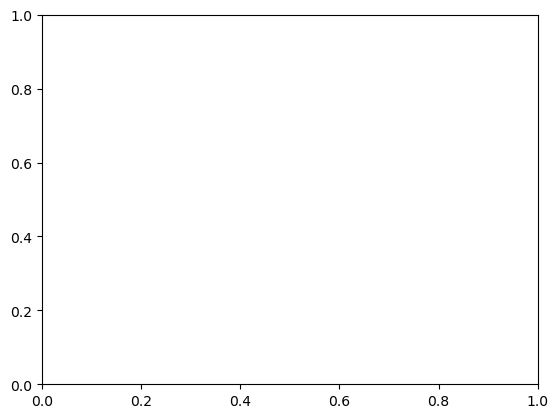

In [214]:
ns_in=[]
for j in range(0,40):
        nsj_t = nsj_tot[:,j]
        ns=np.sum(nsj_t)/37 #np.sum(xw_model=37)
        ns_in.append(ns)
print(ns_in)
ns_in=np.array(ns_in)
print(ns_in.shape)


#print(x_axis)

In [205]:
for i in range(0,37):
    dec_mag0=dec_mag[i]
    print(dec_mag0)

72.17394444444444
61.750886111111114
57.53969722222222
45.276088888888886
66.05658333333334
59.87738888888889
54.293301638888884
49.818694444444446
47.576858333333334
45.86197222222222
40.118766666666666
38.15808333333333
28.99171722222222
20.388930555555554
19.702241249999997
16.11
16.05922222222222
8.514583333333334
8.734438888888889
4.930233333333334
0.5549444444444445
9.32225
21.896607333333332
58.87901388888889
29.536333333333335
22.92
20.619722222222222
15.977049999999998
2.9185833333333338
34.330000000000005
2.9583055555555555
73.5
-25.02
68.845
42.3
-26.87
-26.1


In [201]:
print(N_i)

76091


In [202]:
print(N)

1134431


In [203]:
decdiff=np.abs(ice_dec-dec_mag0)
nuind=np.nonzero(decdiff < declcut)

In [204]:
print(N1)

76071
